<a href="https://colab.research.google.com/github/ChanifRusydi/pembelajaran-mesin-lanjut/blob/main/Tugas1/TugasKelompok1_20241107.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Tugas 1: Multi Armed Bandit** <br>
Grup 1
1. Endang Rusiana
2. Muchammad 'Irfan Chanif Rusydi
3. Dimas Maulana

![Image Description](https://miro.medium.com/v2/resize:fit:720/format:webp/1*5q0Mihf29fftuXpKWWX2uA.png)


# Epsilon-Greedy


First 5 rows of the Reward Samples Table:
      Arm 0     Arm 1     Arm 2     Arm 3     Arm 4     Arm 5     Arm 6  \
0  0.496714 -0.138264  0.647689  1.523030 -0.234153 -0.234137  1.579213   
1 -0.463418 -0.465730  0.241962 -1.913280 -1.724918 -0.562288 -1.012831   
2  1.465649 -0.225776  0.067528 -1.424748 -0.544383  0.110923 -1.150994   
3 -0.601707  1.852278 -0.013497 -1.057711  0.822545 -1.220844  0.208864   
4  0.738467  0.171368 -0.115648 -0.301104 -1.478522 -0.719844 -0.460639   

      Arm 7     Arm 8     Arm 9  
0  0.767435 -0.469474  0.542560  
1  0.314247 -0.908024 -1.412304  
2  0.375698 -0.600639 -0.291694  
3 -1.959670 -1.328186  0.196861  
4  1.057122  0.343618 -1.763040  
True Probabilities for Each Arm:
Arm 0: 0.0557
Arm 1: 0.9858
Arm 2: 0.8000
Arm 3: 0.8688
Arm 4: 0.6943
Arm 5: 0.1861
Arm 6: 0.0310
Arm 7: 0.8647
Arm 8: 0.3963
Arm 9: 0.2639


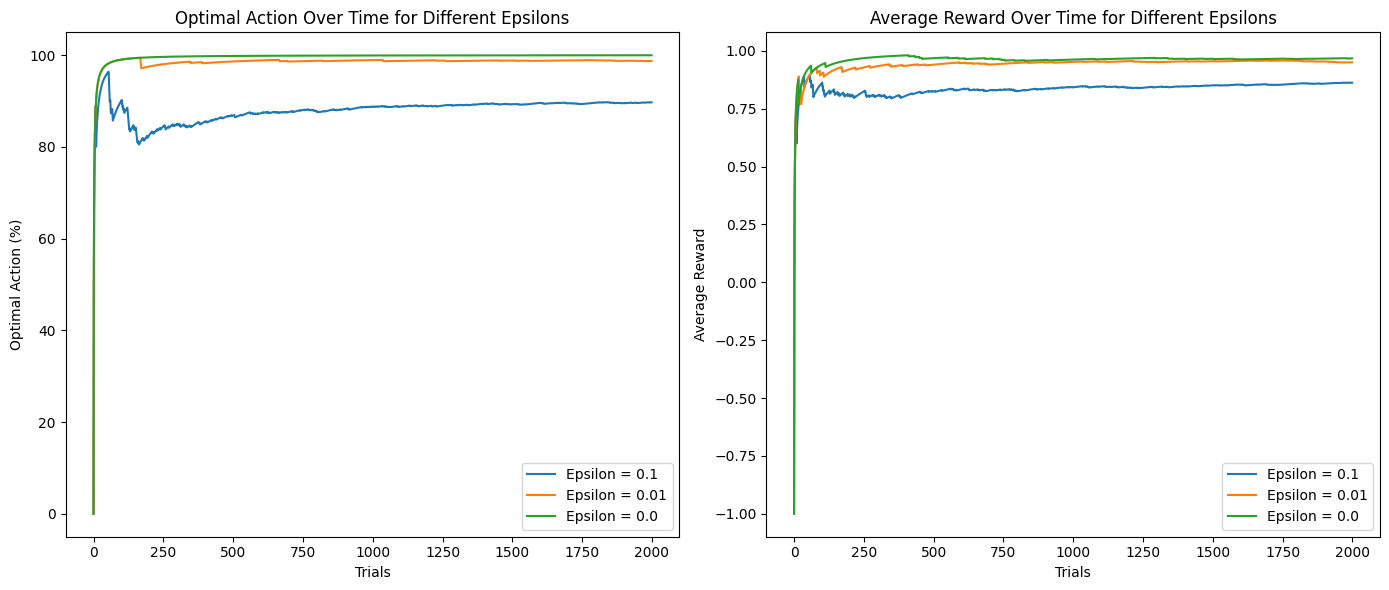

Average reward distribution for epsilon = 0.1:
Arm 0: -0.8519 average reward
Arm 1: 0.9744 average reward
Arm 2: 0.6800 average reward
Arm 3: 0.6667 average reward
Arm 4: 0.0526 average reward
Arm 5: -0.5652 average reward
Arm 6: -0.9048 average reward
Arm 7: 0.7500 average reward
Arm 8: -0.4118 average reward
Arm 9: -0.5385 average reward


Average reward distribution for epsilon = 0.01:
Arm 0: -1.0000 average reward
Arm 1: 0.9645 average reward
Arm 2: 0.0000 average reward
Arm 3: 0.5000 average reward
Arm 4: 0.5000 average reward
Arm 5: -1.0000 average reward
Arm 6: -1.0000 average reward
Arm 7: 0.0000 average reward
Arm 8: 0.0000 average reward
Arm 9: -1.0000 average reward


Average reward distribution for epsilon = 0.0:
Arm 0: -1.0000 average reward
Arm 1: 0.9680 average reward
Arm 2: 0.0000 average reward
Arm 3: 0.0000 average reward
Arm 4: 0.0000 average reward
Arm 5: 0.0000 average reward
Arm 6: 0.0000 average reward
Arm 7: 0.0000 average reward
Arm 8: 0.0000 average reward
Arm

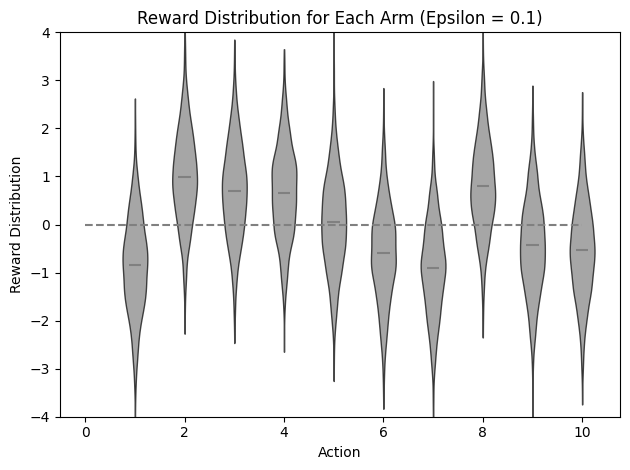

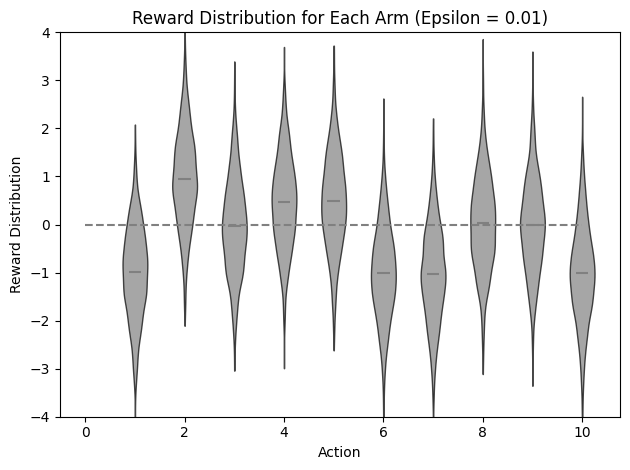

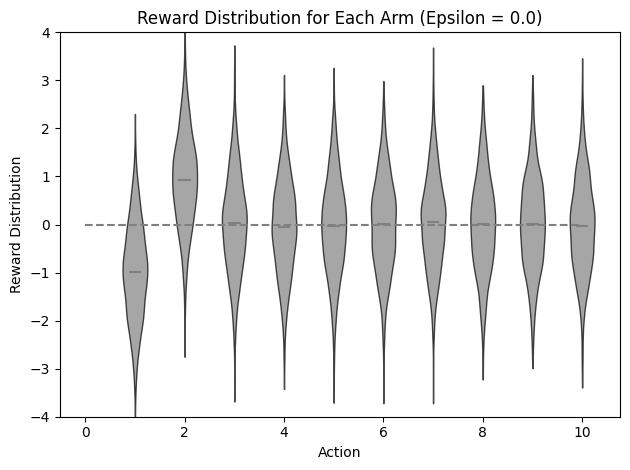

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Setting random seed for reproducibility
np.random.seed(42)

# Parameter setting
n_arms = 10  # number of arms
n_trials = 2000  # number of trials
epsilons = [0.1, 0.01, 0.0]  # list of epsilon values to compare

# Generate the random numbers
reward_samples = np.random.randn(2000, n_arms)

# Convert the array to a pandas DataFrame for better visualization
reward_samples_df = pd.DataFrame(reward_samples, columns=[f"Arm {i}" for i in range(n_arms)])
# Optionally, display the first few rows of the table
print("\nFirst 5 rows of the Reward Samples Table:")
print(reward_samples_df.head())  # Display first 5 rows

# Probabilities for each arm
true_probabilities = np.random.rand(n_arms)

# Print the true probabilities for each arm
print("True Probabilities for Each Arm:")
for arm in range(n_arms):
    print(f"Arm {arm}: {true_probabilities[arm]:.4f}")

optimal_arm = np.argmax(true_probabilities)  # arm with the highest probability

# Simulation for each epsilon value
results = {}

# Tracking reward distribution for each arm
average_reward_distribution = np.zeros((n_arms, len(epsilons)))
reward_distribution = np.zeros((n_arms, len(epsilons)))

for idx, epsilon in enumerate(epsilons):
    # Initialize statistics for wins and trials per arm
    wins = np.zeros(n_arms)
    trials = np.zeros(n_arms)
    optimal_action_counts = np.zeros(n_trials)
    rewards = np.zeros(n_trials)

    total_reward = 0
    for t in range(n_trials):
        # Exploration with epsilon probability
        if np.random.rand() < epsilon:
            chosen_arm = np.random.randint(0, n_arms)
        else:
            # Exploitation - pick the arm with the highest average reward
            average_reward = wins / (trials + 1e-10)  # Avoid division by zero
            chosen_arm = np.argmax(average_reward)

        # Get the reward for the chosen arm
        reward = 1 if np.random.rand() < true_probabilities[chosen_arm] else -1

        # Update statistics
        wins[chosen_arm] += reward
        trials[chosen_arm] += 1
        total_reward += reward

        # Store the rewards and optimal action
        rewards[t] = total_reward
        if chosen_arm == optimal_arm:
            optimal_action_counts[t] = 1  # Count as optimal action

    # Calculate the percentage of optimal actions and average rewards
    optimal_action_percentage = np.cumsum(optimal_action_counts) / (np.arange(1, n_trials + 1)) * 100
    average_rewards = rewards / (np.arange(1, n_trials + 1))

    # Save results for each epsilon
    results[epsilon] = (optimal_action_percentage, average_rewards)

    # Calculate average reward distribution for each arm and epsilon
    for arm in range(n_arms):
        if trials[arm] > 0:
            average_reward_distribution[arm, idx] = wins[arm] / trials[arm]  # Calculate average reward

# Plotting results
plt.figure(figsize=(14, 6))

# Plot percentage of Optimal Actions
plt.subplot(1, 2, 1)
for epsilon in epsilons:
    plt.plot(results[epsilon][0], label=f"Epsilon = {epsilon}")
plt.xlabel("Trials")
plt.ylabel("Optimal Action (%)")
plt.title("Optimal Action Over Time for Different Epsilons")
plt.legend()

# Plot average reward
plt.subplot(1, 2, 2)
for epsilon in epsilons:
    plt.plot(results[epsilon][1], label=f"Epsilon = {epsilon}")
plt.xlabel("Trials")
plt.ylabel("Average Reward")
plt.title("Average Reward Over Time for Different Epsilons")
plt.legend()

plt.tight_layout()
plt.show()

# Display average reward distribution for each arm
for idx, epsilon in enumerate(epsilons):
    print(f"Average reward distribution for epsilon = {epsilon}:")
    for arm in range(n_arms):
        print(f"Arm {arm}: {average_reward_distribution[arm, idx]:.4f} average reward")
    print("\n")

# Plotting reward distribution for each arm separately for each epsilon
for idx, epsilon in enumerate(epsilons):
  # Generate the violin plot with corrected reward samples
  fig = plt.figure()
  ax = fig.add_subplot(111)

  # Generate 2000 samples per action with 10 actions centered around average reward per arm
  reward_samples = np.random.randn(2000, n_arms) + average_reward_distribution[:, idx]  # Use epsilon=0 as an example

  # Create the violin plot
  parts = ax.violinplot(reward_samples, showmeans=True, showextrema=False)

  # Set color for each violin body
  for pc in parts['bodies']:
      pc.set_facecolor('gray')  # Gray color for violins
      pc.set_edgecolor('black')  # Optional: adds border to violins
      pc.set_alpha(0.7)  # Optional: adjust transparency

  # Set color for the mean marker
  parts['cmeans'].set_color('gray')

  # Add a horizontal dashed line at y=0
  ax.plot([0, n_arms], [0, 0], color='gray', linestyle='--')

  # Set y-axis limits
  ax.set_ylim([-4, 4])

  # Add axis labels
  ax.set_xlabel("Action")
  ax.set_ylabel("Reward Distribution")
  # Add a title for the plot (including epsilon value)
  ax.set_title(f"Reward Distribution for Each Arm (Epsilon = {epsilon})")

  # Adjust layout and show the plot
  plt.tight_layout()
  plt.show()


# Upper Confidence Bound (UCB)

$$UCB(a) = \hat{Q}(a) + c \cdot \sqrt{\frac{\ln(t)}{N(a)}}$$


First 5 rows of the Reward Samples Table:
      Arm 0     Arm 1     Arm 2     Arm 3     Arm 4     Arm 5     Arm 6  \
0  0.496714 -0.138264  0.647689  1.523030 -0.234153 -0.234137  1.579213   
1 -0.463418 -0.465730  0.241962 -1.913280 -1.724918 -0.562288 -1.012831   
2  1.465649 -0.225776  0.067528 -1.424748 -0.544383  0.110923 -1.150994   
3 -0.601707  1.852278 -0.013497 -1.057711  0.822545 -1.220844  0.208864   
4  0.738467  0.171368 -0.115648 -0.301104 -1.478522 -0.719844 -0.460639   

      Arm 7     Arm 8     Arm 9  
0  0.767435 -0.469474  0.542560  
1  0.314247 -0.908024 -1.412304  
2  0.375698 -0.600639 -0.291694  
3 -1.959670 -1.328186  0.196861  
4  1.057122  0.343618 -1.763040  
True Probabilities for Each Arm:
Arm 0: 0.0557
Arm 1: 0.9858
Arm 2: 0.8000
Arm 3: 0.8688
Arm 4: 0.6943
Arm 5: 0.1861
Arm 6: 0.0310
Arm 7: 0.8647
Arm 8: 0.3963
Arm 9: 0.2639


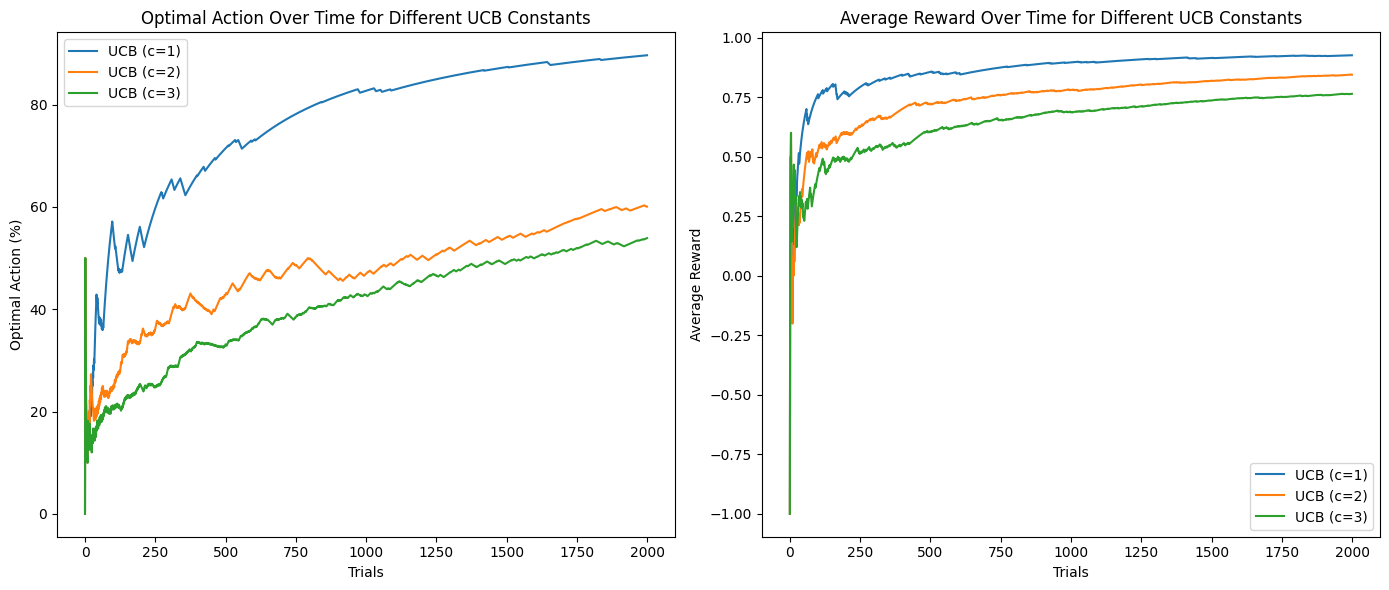

Average reward distribution for UCB (c=1):
Arm 0: -1.0000 average reward
Arm 1: 0.9699 average reward
Arm 2: 0.6774 average reward
Arm 3: 0.6087 average reward
Arm 4: 0.5172 average reward
Arm 5: -1.0000 average reward
Arm 6: -1.0000 average reward
Arm 7: 0.6552 average reward
Arm 8: -0.5000 average reward
Arm 9: -1.0000 average reward


Average reward distribution for UCB (c=2):
Arm 0: -1.0000 average reward
Arm 1: 0.9767 average reward
Arm 2: 0.7110 average reward
Arm 3: 0.7626 average reward
Arm 4: 0.4375 average reward
Arm 5: -0.2222 average reward
Arm 6: -1.0000 average reward
Arm 7: 0.8014 average reward
Arm 8: -0.3333 average reward
Arm 9: -0.4286 average reward


Average reward distribution for UCB (c=3):
Arm 0: -1.0000 average reward
Arm 1: 0.9740 average reward
Arm 2: 0.6558 average reward
Arm 3: 0.7154 average reward
Arm 4: 0.3478 average reward
Arm 5: -0.6842 average reward
Arm 6: -1.0000 average reward
Arm 7: 0.7008 average reward
Arm 8: -0.4400 average reward
Arm 9: -0.54

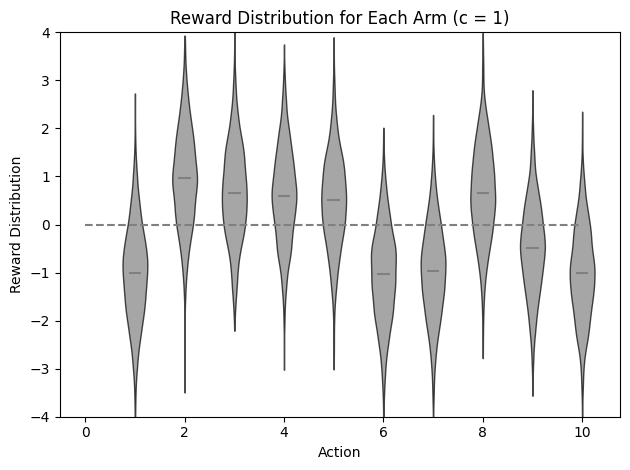

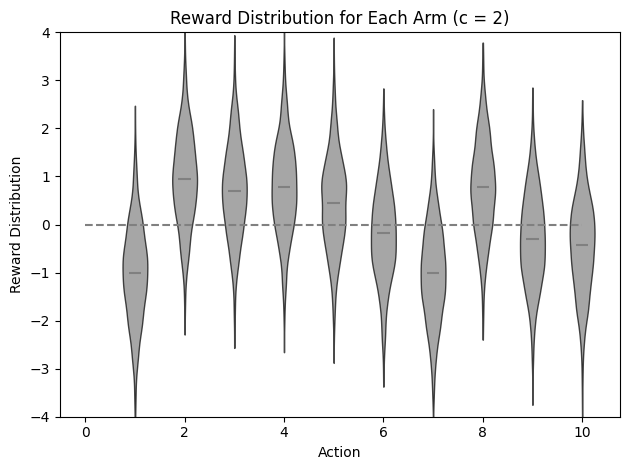

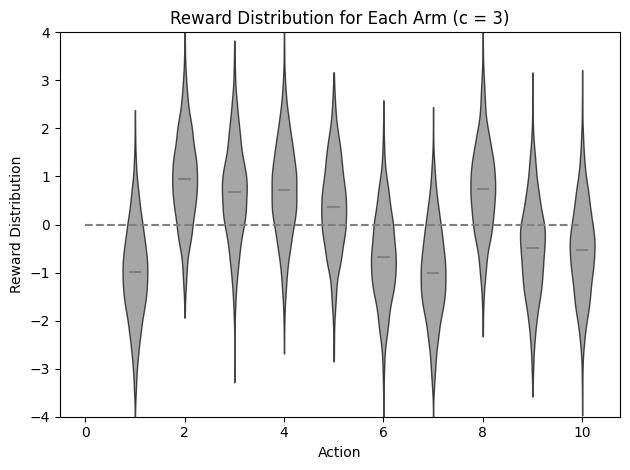

In [61]:
import numpy as np
import matplotlib.pyplot as plt

# Setting random seed for reproducibility
np.random.seed(42)

# Parameter setting
n_arms = 10  # number of arms
n_trials = 2000  # number of trials
c_values = [1, 2, 3]  # Different exploration constants for UCB

# Generate the random numbers
reward_samples = np.random.randn(2000, n_arms)

# Convert the array to a pandas DataFrame for better visualization
reward_samples_df = pd.DataFrame(reward_samples, columns=[f"Arm {i}" for i in range(n_arms)])
# Optionally, display the first few rows of the table
print("\nFirst 5 rows of the Reward Samples Table:")
print(reward_samples_df.head())  # Display first 5 rows

# Probabilities for each arm
true_probabilities = np.random.rand(n_arms)

# Print the true probabilities for each arm
print("True Probabilities for Each Arm:")
for arm in range(n_arms):
    print(f"Arm {arm}: {true_probabilities[arm]:.4f}")

optimal_arm = np.argmax(true_probabilities)  # arm with the highest probability

# Simulation for UCB with different values of c
results = {}

# Tracking reward distribution for each arm
average_reward_distribution = np.zeros((n_arms, len(c_values)))

# Run simulation for each value of c
for c_idx, c in enumerate(c_values):
    # Initialize statistics for wins, trials per arm, and average rewards
    wins = np.zeros(n_arms)
    trials = np.zeros(n_arms)
    optimal_action_counts = np.zeros(n_trials)
    rewards = np.zeros(n_trials)

    total_reward = 0
    for t in range(1, n_trials + 1):
        # UCB - select arm based on UCB formula
        ucb_values = (wins / (trials + 1e-10)) + c * np.sqrt(np.log(t) / (trials + 1e-10))  # Avoid division by zero
        chosen_arm = np.argmax(ucb_values)

        # Get the reward for the chosen arm
        reward = 1 if np.random.rand() < true_probabilities[chosen_arm] else -1

        # Update statistics
        wins[chosen_arm] += reward
        trials[chosen_arm] += 1
        total_reward += reward

        # Store the rewards and optimal action
        rewards[t - 1] = total_reward
        if chosen_arm == optimal_arm:
            optimal_action_counts[t - 1] = 1  # Count as optimal action

    # Calculate the percentage of optimal actions and average rewards
    optimal_action_percentage = np.cumsum(optimal_action_counts) / (np.arange(1, n_trials + 1)) * 100
    average_rewards = rewards / (np.arange(1, n_trials + 1))

    # Save results for current c
    results[f'UCB_c_{c}'] = (optimal_action_percentage, average_rewards)

    # Calculate average reward distribution for each arm for current c
    for arm in range(n_arms):
        if trials[arm] > 0:
            average_reward_distribution[arm, c_idx] = wins[arm] / trials[arm]  # Calculate average reward

# Plotting results
plt.figure(figsize=(14, 6))

# Plot percentage of Optimal Actions
plt.subplot(1, 2, 1)
for c in c_values:
    plt.plot(results[f'UCB_c_{c}'][0], label=f"UCB (c={c})")
plt.xlabel("Trials")
plt.ylabel("Optimal Action (%)")
plt.title("Optimal Action Over Time for Different UCB Constants")
plt.legend()

# Plot average reward
plt.subplot(1, 2, 2)
for c in c_values:
    plt.plot(results[f'UCB_c_{c}'][1], label=f"UCB (c={c})")
plt.xlabel("Trials")
plt.ylabel("Average Reward")
plt.title("Average Reward Over Time for Different UCB Constants")
plt.legend()

plt.tight_layout()
plt.show()

# Display average reward distribution for each arm for each c
for c_idx, c in enumerate(c_values):
    print(f"Average reward distribution for UCB (c={c}):")
    for arm in range(n_arms):
        print(f"Arm {arm}: {average_reward_distribution[arm, c_idx]:.4f} average reward")
    print("\n")

# Plotting reward distribution for each arm separately for each epsilon
for idx, c_values in enumerate(c_values):
  # Generate the violin plot with corrected reward samples
  fig = plt.figure()
  ax = fig.add_subplot(111)

  # Generate 2000 samples per action with 10 actions centered around average reward per arm
  reward_samples = np.random.randn(2000, n_arms) + average_reward_distribution[:, idx]  # Use epsilon=0 as an example

  # Create the violin plot
  parts = ax.violinplot(reward_samples, showmeans=True, showextrema=False)

  # Set color for each violin body
  for pc in parts['bodies']:
      pc.set_facecolor('gray')  # Gray color for violins
      pc.set_edgecolor('black')  # Optional: adds border to violins
      pc.set_alpha(0.7)  # Optional: adjust transparency

  # Set color for the mean marker
  parts['cmeans'].set_color('gray')

  # Add a horizontal dashed line at y=0
  ax.plot([0, n_arms], [0, 0], color='gray', linestyle='--')

  # Set y-axis limits
  ax.set_ylim([-4, 4])

  # Add axis labels
  ax.set_xlabel("Action")
  ax.set_ylabel("Reward Distribution")
  ax.set_title(f"Reward Distribution for Each Arm (c = {c_values})")

  # Adjust layout and show the plot
  plt.tight_layout()
  plt.show()


# Softmax

$$P(a) = \frac{e^{\hat{Q}(a)/\tau}}{\sum_{b=1}^{N}e^{\hat{Q}(b)/\tau}}$$


First 5 rows of the Reward Samples Table:
      Arm 0     Arm 1     Arm 2     Arm 3     Arm 4     Arm 5     Arm 6  \
0  0.496714 -0.138264  0.647689  1.523030 -0.234153 -0.234137  1.579213   
1 -0.463418 -0.465730  0.241962 -1.913280 -1.724918 -0.562288 -1.012831   
2  1.465649 -0.225776  0.067528 -1.424748 -0.544383  0.110923 -1.150994   
3 -0.601707  1.852278 -0.013497 -1.057711  0.822545 -1.220844  0.208864   
4  0.738467  0.171368 -0.115648 -0.301104 -1.478522 -0.719844 -0.460639   

      Arm 7     Arm 8     Arm 9  
0  0.767435 -0.469474  0.542560  
1  0.314247 -0.908024 -1.412304  
2  0.375698 -0.600639 -0.291694  
3 -1.959670 -1.328186  0.196861  
4  1.057122  0.343618 -1.763040  
True Probabilities for Each Arm:
Arm 0: 0.0557
Arm 1: 0.9858
Arm 2: 0.8000
Arm 3: 0.8688
Arm 4: 0.6943
Arm 5: 0.1861
Arm 6: 0.0310
Arm 7: 0.8647
Arm 8: 0.3963
Arm 9: 0.2639


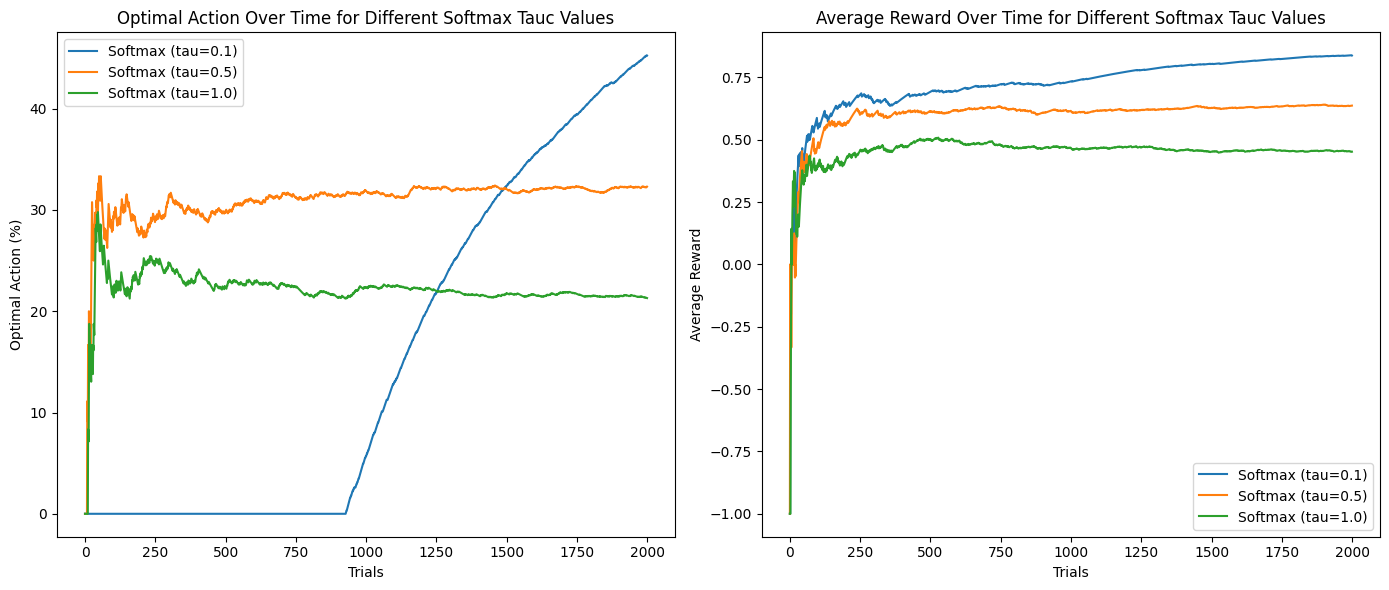

Average reward distribution for Softmax (tau=0.1):
Arm 0: -1.0000 average reward
Arm 1: 0.9823 average reward
Arm 2: 0.6505 average reward
Arm 3: 0.7800 average reward
Arm 4: -1.0000 average reward
Arm 5: -1.0000 average reward
Arm 6: -1.0000 average reward
Arm 7: 0.7062 average reward
Arm 8: 0.0000 average reward
Arm 9: 0.0000 average reward


Average reward distribution for Softmax (tau=0.5):
Arm 0: -1.0000 average reward
Arm 1: 0.9659 average reward
Arm 2: 0.4628 average reward
Arm 3: 0.6588 average reward
Arm 4: 0.3684 average reward
Arm 5: -0.5294 average reward
Arm 6: -1.0000 average reward
Arm 7: 0.7375 average reward
Arm 8: -0.2000 average reward
Arm 9: -0.4000 average reward


Average reward distribution for Softmax (tau=1.0):
Arm 0: -0.8750 average reward
Arm 1: 0.9718 average reward
Arm 2: 0.6533 average reward
Arm 3: 0.6853 average reward
Arm 4: 0.4059 average reward
Arm 5: -0.7297 average reward
Arm 6: -0.9245 average reward
Arm 7: 0.7101 average reward
Arm 8: -0.2373 aver

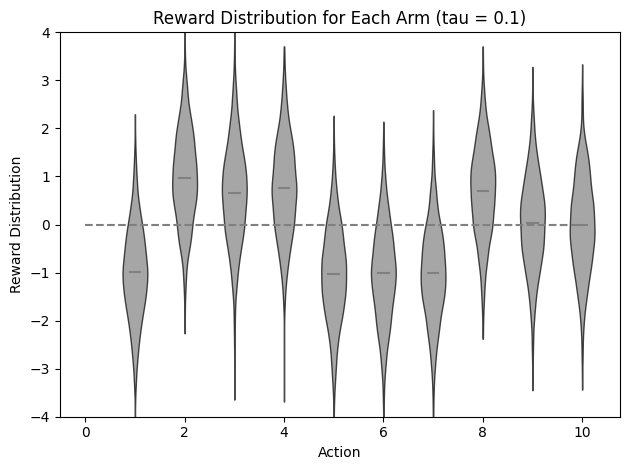

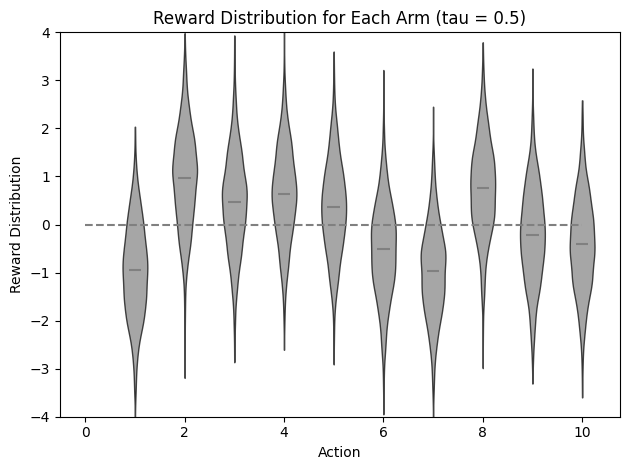

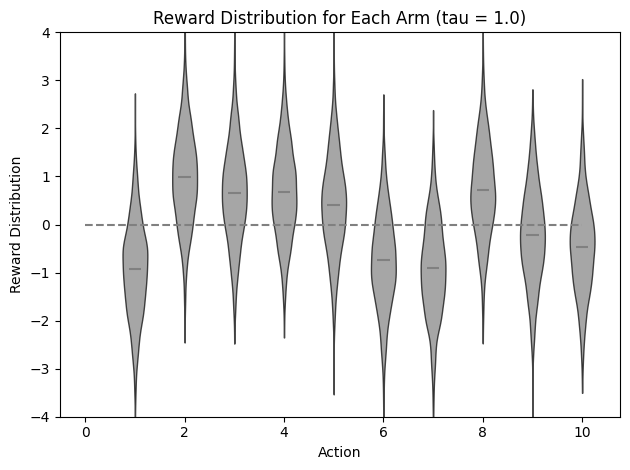

In [63]:
import numpy as np
import matplotlib.pyplot as plt

# Setting random seed for reproducibility
np.random.seed(42)

# Parameter setting
n_arms = 10  # number of arms
n_trials = 2000  # number of trials
tau_values = [0.1, 0.5, 1.0]  # Different temperature parameters for Softmax

# Generate the random numbers
reward_samples = np.random.randn(2000, n_arms)

# Convert the array to a pandas DataFrame for better visualization
reward_samples_df = pd.DataFrame(reward_samples, columns=[f"Arm {i}" for i in range(n_arms)])
# Optionally, display the first few rows of the table
print("\nFirst 5 rows of the Reward Samples Table:")
print(reward_samples_df.head())  # Display first 5 rows

# Probabilities for each arm
true_probabilities = np.random.rand(n_arms)

# Print the true probabilities for each arm
print("True Probabilities for Each Arm:")
for arm in range(n_arms):
    print(f"Arm {arm}: {true_probabilities[arm]:.4f}")

optimal_arm = np.argmax(true_probabilities)  # arm with the highest probability

# Simulation for Softmax with different values of tau
results = {}

# Tracking reward distribution for each arm
average_reward_distribution = np.zeros((n_arms, len(tau_values)))

# Run simulation for each value of tau
for tau_idx, tau in enumerate(tau_values):
    # Initialize statistics for wins, trials per arm, and average rewards
    wins = np.zeros(n_arms)
    trials = np.zeros(n_arms)
    optimal_action_counts = np.zeros(n_trials)
    rewards = np.zeros(n_trials)

    total_reward = 0
    for t in range(1, n_trials + 1):
        # Softmax - select arm based on Softmax probabilities
        average_rewards = wins / (trials + 1e-10)  # Avoid division by zero
        exp_values = np.exp(average_rewards / tau)
        softmax_probs = exp_values / np.sum(exp_values)  # Normalize to get probabilities

        chosen_arm = np.random.choice(np.arange(n_arms), p=softmax_probs)

        # Get the reward for the chosen arm
        reward = 1 if np.random.rand() < true_probabilities[chosen_arm] else -1

        # Update statistics
        wins[chosen_arm] += reward
        trials[chosen_arm] += 1
        total_reward += reward

        # Store the rewards and optimal action
        rewards[t - 1] = total_reward
        if chosen_arm == optimal_arm:
            optimal_action_counts[t - 1] = 1  # Count as optimal action

    # Calculate the percentage of optimal actions and average rewards
    optimal_action_percentage = np.cumsum(optimal_action_counts) / (np.arange(1, n_trials + 1)) * 100
    average_rewards = rewards / (np.arange(1, n_trials + 1))

    # Save results for current tau
    results[f'Softmax_tau_{tau}'] = (optimal_action_percentage, average_rewards)

    # Calculate average reward distribution for each arm for current tau
    for arm in range(n_arms):
        if trials[arm] > 0:
            average_reward_distribution[arm, tau_idx] = wins[arm] / trials[arm]  # Calculate average reward

# Plotting results
plt.figure(figsize=(14, 6))

# Plot percentage of Optimal Actions
plt.subplot(1, 2, 1)
for tau in tau_values:
    plt.plot(results[f'Softmax_tau_{tau}'][0], label=f"Softmax (tau={tau})")
plt.xlabel("Trials")
plt.ylabel("Optimal Action (%)")
plt.title("Optimal Action Over Time for Different Softmax Tauc Values")
plt.legend()

# Plot average reward
plt.subplot(1, 2, 2)
for tau in tau_values:
    plt.plot(results[f'Softmax_tau_{tau}'][1], label=f"Softmax (tau={tau})")
plt.xlabel("Trials")
plt.ylabel("Average Reward")
plt.title("Average Reward Over Time for Different Softmax Tauc Values")
plt.legend()

plt.tight_layout()
plt.show()

# Display average reward distribution for each arm for each tau
for tau_idx, tau in enumerate(tau_values):
    print(f"Average reward distribution for Softmax (tau={tau}):")
    for arm in range(n_arms):
        print(f"Arm {arm}: {average_reward_distribution[arm, tau_idx]:.4f} average reward")
    print("\n")

# Plotting reward distribution for each arm separately for each epsilon
for idx, tau_values in enumerate(tau_values):
  # Generate the violin plot with corrected reward samples
  fig = plt.figure()
  ax = fig.add_subplot(111)

  # Generate 2000 samples per action with 10 actions centered around average reward per arm
  reward_samples = np.random.randn(2000, n_arms) + average_reward_distribution[:, idx]  # Use epsilon=0 as an example

  # Create the violin plot
  parts = ax.violinplot(reward_samples, showmeans=True, showextrema=False)

  # Set color for each violin body
  for pc in parts['bodies']:
      pc.set_facecolor('gray')  # Gray color for violins
      pc.set_edgecolor('black')  # Optional: adds border to violins
      pc.set_alpha(0.7)  # Optional: adjust transparency

  # Set color for the mean marker
  parts['cmeans'].set_color('gray')

  # Add a horizontal dashed line at y=0
  ax.plot([0, n_arms], [0, 0], color='gray', linestyle='--')

  # Set y-axis limits
  ax.set_ylim([-4, 4])

  # Add axis labels
  ax.set_xlabel("Action")
  ax.set_ylabel("Reward Distribution")
  ax.set_title(f"Reward Distribution for Each Arm (tau = {tau_values})")

  # Adjust layout and show the plot
  plt.tight_layout()
  plt.show()